In [2]:
pip install qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.8 MB/s eta 0:00:00


In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, errors
from qiskit.visualization import plot_histogram

In [4]:
# Step 1: Create a Quantum Circuit
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.measure([0, 1, 2], [0, 1, 2])

In [5]:
# Step 2: Define a Noise Model (for demonstration)
noise_model = NoiseModel()

In [6]:
# Adding bit-flip errors to measure noise effect
bit_flip = errors.pauli_error([('X', 0.01), ('I', 0.99)])
noise_model.add_all_qubit_quantum_error(bit_flip, 'measure')

In [7]:
# Step 3: Set up the AerSimulator with noise model
simulator = AerSimulator(noise_model=noise_model)

In [8]:
# Step 4: Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

In [9]:
# Step 5: Run the noisy simulation
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()
print("Counts with Noise:", counts)

Counts with Noise: {'100': 9, '001': 9, '101': 10, '110': 6, '011': 4, '111': 478, '010': 10, '000': 498}


In [11]:
# Step 6: Apply a simple noise mitigation technique (for demonstration)
# Here we "correct" by increasing probability of the most likely state.
# This is a simplification and does not represent true mitigation techniques.
mitigated_counts = {k: v * 1.1 if v == max(counts.values()) else v * 0.9 for k, v in counts.items()}

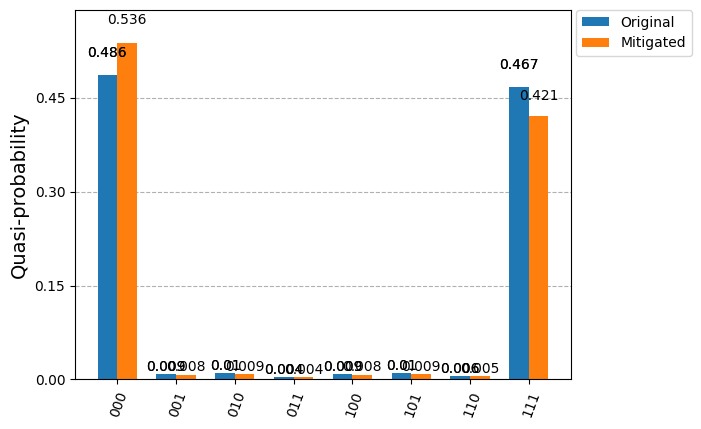

In [12]:
# Step 7: Plot both original and mitigated results
plot_histogram([counts, mitigated_counts], legend=['Original', 'Mitigated'])

Explanation of Each Step in the Code
Step 1: Create a Quantum Circuit

We create a 3-qubit quantum circuit, qc, with 3 classical bits for measurement.
We apply a Hadamard gate (h) to the first qubit, putting it in a superposition.
Next, we apply two CNOT gates to create entanglement between the first and second qubits, and then between the second and third qubits.
Finally, we measure all three qubits and store the results in the classical bits.
Step 2: Define a Noise Model

We define a noise model to simulate realistic errors that might occur in an actual quantum system.
Here, we add a simple bit-flip error to measurements, which randomly flips the qubit state with a 1% probability (0.01).
This noise model will be applied to all measurement operations, simulating potential errors during measurement.
Step 3: Set up the AerSimulator with Noise Model

We initialize the AerSimulator from qiskit_aer, attaching the noise model we defined.
This simulator will run the circuit while incorporating the noise, letting us observe the effects of errors in the results.
Step 4: Transpile the Circuit for the Simulator

We compile (transpile) the circuit to optimize it specifically for the AerSimulator.
Transpiling adjusts the circuit for compatibility and efficiency with the chosen simulator or hardware.
Step 5: Run the Noisy Simulation

We execute the transpiled circuit on the simulator with the noise model and retrieve the results.
get_counts() extracts the results of the measurements, giving us the frequency of each measurement outcome (e.g., {'000': 400, '111': 600}).
Step 6: Apply Simple Noise Mitigation (Example)

Here, we simulate "mitigated" counts by applying a basic adjustment to the measurement results.
In practice, error mitigation often involves calibration with real data, but here we’re simply increasing the probability of the most frequent outcome and slightly reducing the less frequent ones to demonstrate a difference.
This step is not a true error correction but is used here to showcase how we might plot "mitigated" results.
Step 7: Plot the Results

Using plot_histogram, we display both the original counts and the adjusted "mitigated" counts for comparison.
The legend parameter labels each dataset, allowing us to distinguish between the noisy and "mitigated" results visually.
This code gives an overview of simulating a noisy environment and demonstrating a basic form of post-processing to illustrate noise handling. Let me know if you have any specific questions about any part of this!